# Matplotlib Formatting Charts

In [15]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='job_title_short'>

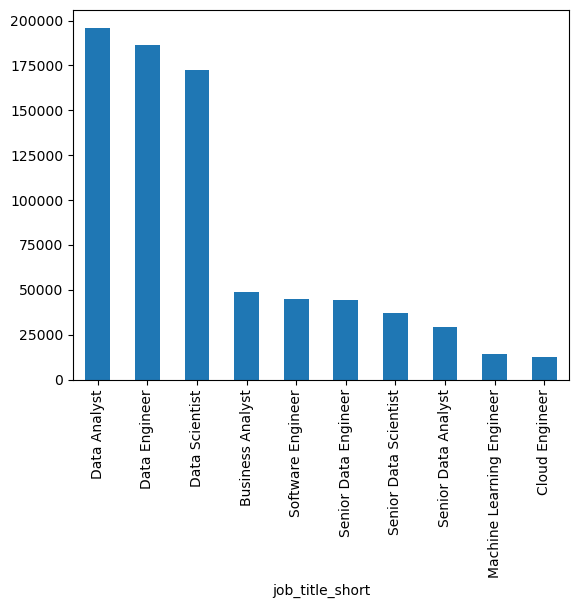

In [16]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

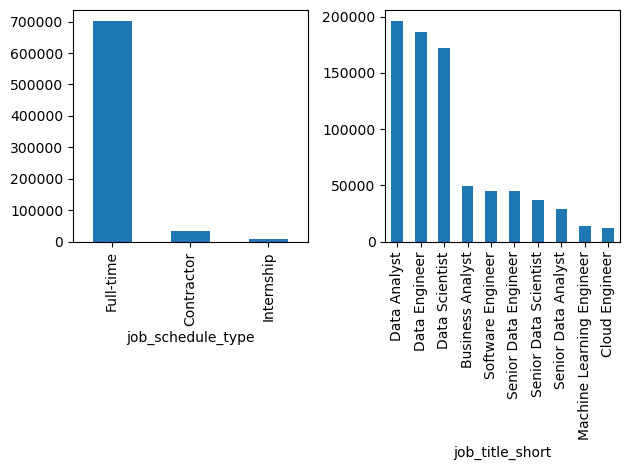

In [17]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind= 'bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind= 'bar', ax=ax[0])

fig.tight_layout()

In [21]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_title_short','job_skills']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace= True)

In [22]:
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


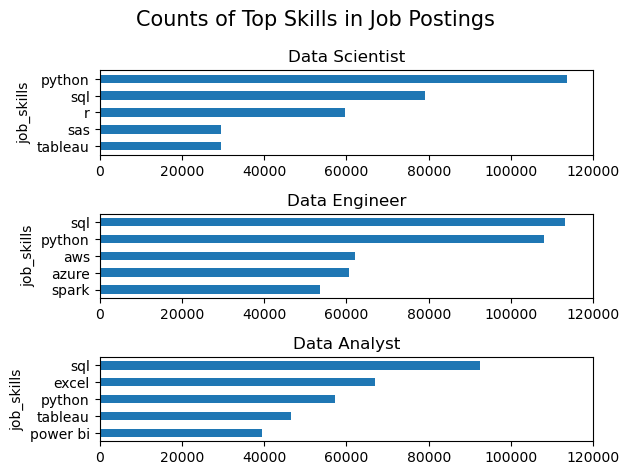

In [44]:
#Creating a list so we can loop trough every job title
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

fig,ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles): #enumerate brings index(starting from 0) and walue
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5) #filtering job_title short what matches job list
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title) #ax=ax[i] so it would be applicable on every cart
    ax[i].invert_yaxis()
    ax[i].set_label('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()